# Car Price Prediction Project with AI, ML, and TensorFLow

Datasource: https://www.kaggle.com/datasets/cooperunion/cardataset

### Machine Learning for Regression

In [1496]:
import pandas as pd
import numpy as np

In [1497]:
df = pd.read_csv('data.csv', index_col=False)

In [1498]:
df.head(1)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135


In [1499]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [1500]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

Spacing Issue

### Data Cleaning

Note: Column naming issues: Driven_Wheels, spaces, lower/uppercase

In [1501]:
df['Transmission Type']

0           MANUAL
1           MANUAL
2           MANUAL
3           MANUAL
4           MANUAL
           ...    
11909    AUTOMATIC
11910    AUTOMATIC
11911    AUTOMATIC
11912    AUTOMATIC
11913    AUTOMATIC
Name: Transmission Type, Length: 11914, dtype: object

In [1502]:
df.Transmission Type

SyntaxError: invalid syntax (2384802771.py, line 1)

In [1503]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [1504]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [1505]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Values are caps, lower cases, and space issue

In [1506]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [1507]:
df.dtypes[df.dtypes == 'object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [1508]:
df.dtypes[df.dtypes == 'object'].index

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [1509]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [1510]:
# df['make'].str.lower().str.replace(' ', '_')

In [1511]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [1512]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [1513]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [1514]:
df_1 = df

### Exploratory Data Analysis

In [1515]:
for col in df_1.columns:
    print(col)
    print(df_1[col].unique()[:5]) # first 5 unique values
    print(df_1[col].nunique()) # number of unique values
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [1516]:
df_1.head(1)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135


In [1517]:
list(df_1.columns)

['make',
 'model',
 'year',
 'engine_fuel_type',
 'engine_hp',
 'engine_cylinders',
 'transmission_type',
 'driven_wheels',
 'number_of_doors',
 'market_category',
 'vehicle_size',
 'vehicle_style',
 'highway_mpg',
 'city_mpg',
 'popularity',
 'msrp']

#### Distribution of Price (msrp)

In [1518]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

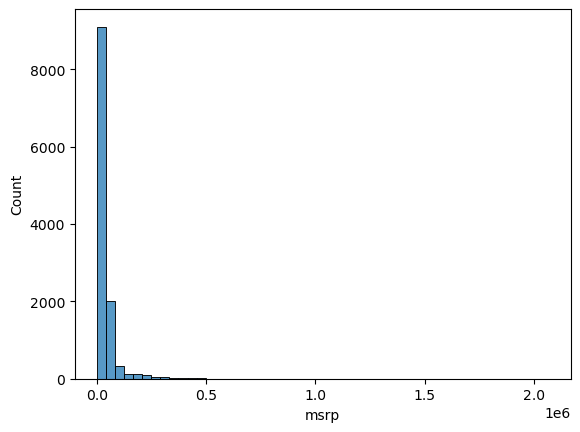

In [1519]:
sns.histplot(df_1.msrp, bins=50)

More vehicles are lower priced
- tailing to the left/skewed distribution

<Axes: xlabel='msrp', ylabel='Count'>

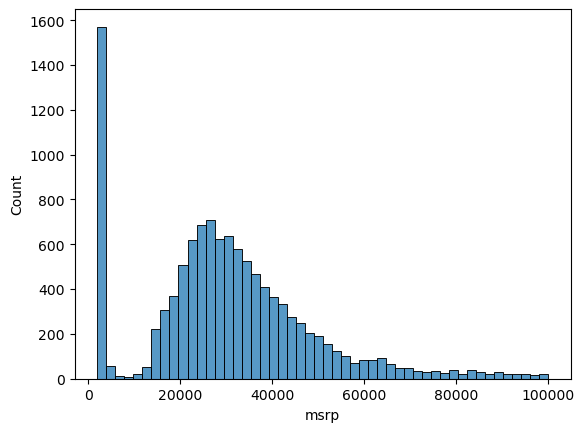

In [1520]:
# Histogram

sns.histplot(df_1.msrp[df_1.msrp < 100000], bins=50)

Clear view of distribution of data points
- range restricted to values less than 100,000 since most are less

In [1521]:
# Natural logarithm

np.log1p([0,1,10,1000,100000]) # used to reduce skewness and stabilize variance

# reduce skewness

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [1522]:
price_logs = np.log1p(df_1.msrp)
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<Axes: xlabel='msrp', ylabel='Count'>

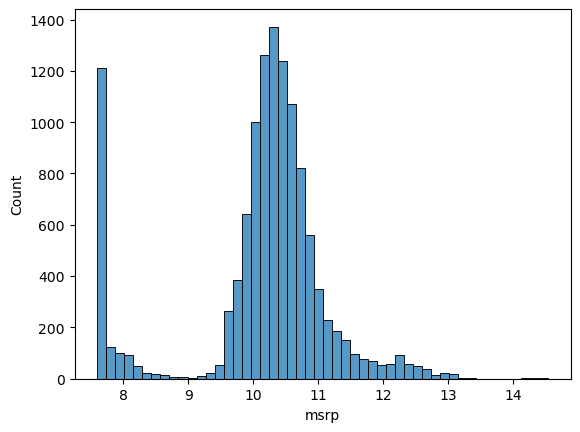

In [1523]:
sns.histplot(price_logs, bins=50)

Reduced skewness, normalized, and stabalized variance
Normal Distribution

#### Missing Values

In [1524]:
df_1.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

### Setting up the validation framework

- Train: 60%
- Validate: 20%
- Test: 20%

In [1525]:
# Size of df
len(df_1)

11914

In [1526]:
len(df_1) * .2

2382.8

Data Splitting or Dataset Partitioning:

In [1527]:
# Spltting Framework into training, validation, and testing

n = len(df_1)

n_val = int(n * 0.2) # Calculates 20% of the total rows for validation
n_test = int(n * 0.2) # Calculates 20% of the total rows for testing.
n_train = n - n_val - n_test # Assigns the remaining 60% of the rows for training

print(f'n_val: {n_val}')
print(f'n_test: {n_test}')
print(f'n_train: {n_train}')

n_val: 2382
n_test: 2382
n_train: 7150


In [1528]:
df_1.iloc[[10,0,3,5]]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
10,bmw,1_series,2013,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39600
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
5,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,31200


In [1529]:
#  select the first 10 rows
df1_train = df_1.iloc[n_train:]

df1_val = df_1.iloc[n_train : n_train + n_val]

df1_test = df_1.iloc[n_train + n_val:]

In [1530]:
df1_train.head(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
7150,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,63645
7151,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,22,16,61,63195


In [1531]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [1532]:
# randomly shuffle
np.random.seed(2)
np.random.shuffle(idx)

In [1533]:
df1_train = df_1.iloc[idx[:n_train]]

#df1_val = df_1.iloc[idx[[n_train : n_train + n_val]]
df1_val = df_1.iloc[idx[n_train:n_train + n_val]]

#df1_test = df_1.iloc[idx[[n_train + n_val:]]
df1_test = df_1.iloc[idx[n_train + n_val:]]

In [1534]:
df1_train.head(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685


In [1535]:
df1_train = df1_train.reset_index(drop=True)
df1_val = df1_val.reset_index(drop=True)
df1_test = df1_test.reset_index(drop=True)

df1_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [1536]:
len(df1_train), len(df1_val), len(df1_test)

(7150, 2382, 2382)

In [1537]:
df1_train.msrp

0        14410
1        19685
2        19795
3         2000
4        56260
         ...  
7145     54900
7146     29215
7147     34675
7148    303300
7149     37820
Name: msrp, Length: 7150, dtype: int64

In [1538]:
# computes the natural logarithm
y_train = np.log1p(df1_train.msrp.values)
y_val = np.log1p(df1_val.msrp.values)
y_test = np.log1p(df1_test.msrp.values)

In [1539]:
del df1_train['msrp']
del df1_val['msrp']
del df1_test['msrp']

In [1540]:
len(y_train)

7150

### Linear Regression

- predict the price of a car based on a few of its features

In [1541]:
df1_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [1542]:
# Example formula:

# xi = [453, 11, 86] # features

# def g(xi):
    # does something
    # return 10000

# g(xi)

In [1543]:
xi = [453, 11, 86] # selected features

In [1544]:
w0 = 7.17 # bias/intercept; prediction value when all featurs are zero
    # predicted value when do not know features
w = [0.01,0.04,0.002] # weights/coefficients for features

In [1545]:
def linear_regression(xi): # calculates the predicted value
    n = len(xi) # calculates the number of features
    
    pred = w0 # prediction starts with the bias term w0
    
    for j in range(n):
        pred = pred + w[j] * xi[j]
        
    return pred # returns the final predicted value

In [1546]:
linear_regression(xi)

12.312

pred = w0 + w[0] × xi[0] + w[1] × xi[1] + w[2] × xi[2]

pred = 7.17 + (0.01 × 453) + (0.04 × 11) + (0.002 × 86)

pred = 7.17 + 4.53 + 0.44 + 0.172

pred = 12.312

In [1547]:
np.exp(12.312)

222348.2221101062

In [1548]:
np.exp(12.312) -1 

222347.2221101062

In [1549]:
np.expm1(12.312)

222347.2221101062

In [1550]:
np.log1p(222347.2221101062)

12.312

In [1551]:
value = np.exp(12.312)

In [1552]:
formatted_value = "${:,.2f}".format(value)

In [1553]:
formatted_value # prediction

'$222,348.22'

### Linear Regression Vector Form

- predicts values based on input features

In [1554]:
def dot(xi, w):
    n = len(xi)

    res = 0.0

    for j in range(n):
        res = res + xi[j] * w[j]

    return res

In [1555]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [1556]:
w_new = [w0] + w # Adding Bias Term to Weights
w_new

[7.17, 0.01, 0.04, 0.002]

In [1557]:
# Linear Regression Function (With Bias Term)

def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [1558]:
linear_regression(xi)

12.312

In [1559]:
# Linear Regression on a Matrix of Inputs

xi = [453, 11, 86]
w0 = 7.17
w = [0.01,0.04,0.002]
w_new = [w0] + w

In [1560]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [1561]:
def linear_regression(X):
    return X.dot(w_new)

In [1562]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

### Training a Linear Regression Model

- predicting continuous values

In [1563]:
def train_linear_regression(X, y):
    pass

In [1564]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],
    ]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [1565]:
# baseline
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [1566]:
#X = np.column_stack([ones, X])

In [1567]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 120]

In [1568]:
XTX = X.T.dot(X)

In [1569]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 2.35803616e-06, -1.46900642e-05,  8.00007928e-09],
       [-1.46900642e-05,  2.94487947e-04, -3.84130606e-06],
       [ 8.00007928e-09, -3.84130606e-06,  2.28083884e-07]])

In [1570]:
XTX.dot(XTX_inv).round(1)

array([[ 1.,  0.,  0.],
       [-0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [1571]:
XTX_inv = np.linalg.inv(XTX)

In [1572]:
w_full = XTX_inv.dot(X.T).dot(y)
w_full

array([ 18.79597656, 260.65006106,   5.07672498])

In [1573]:
w0 = w_full[0]
w = w_full[1:]

In [1574]:
w0, w

(18.795976557583163, array([260.65006106,   5.07672498]))

In [1575]:
def train_linear_regression(X, y, alpha=0.01):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

w0, w = train_linear_regression(X, y)

In [1576]:
train_linear_regression(X, y)

(39156.660509167625, array([ -45.09954388, -475.06189449,   -2.7503787 ]))

represents the bias and weights

### Car Price Baseline Model

In [1577]:
df1_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [1578]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

df1_train[base].head(1)

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385


In [1579]:
X_train = df1_train[base].values

In [1580]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

In [1581]:
train_linear_regression(X_train, y_train)

(nan, array([nan, nan, nan, nan, nan]))

In [1582]:
df1_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [1583]:
df1_train[base].fillna(0)

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [1584]:
df1_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [1585]:
df1_train[base].fillna(0, inplace=True)

C:\Users\ashwi\AppData\Local\Temp\ipykernel_12764\3137186238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_train[base].fillna(0, inplace=True)


In [1586]:
df1_train[base] = df1_train[base].fillna(0)

In [1587]:
df1_train[base].isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [1588]:
df1_train[base].head(1)

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385


In [1589]:
X_train = df1_train[base].fillna(0).values

In [1590]:
w0, w = train_linear_regression(X_train, y_train)

In [1591]:
X_train.dot(w)

array([1.62067044, 1.46008238, 1.74472019, ..., 2.37697276, 4.05063401,
       2.07137372])

In [1592]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

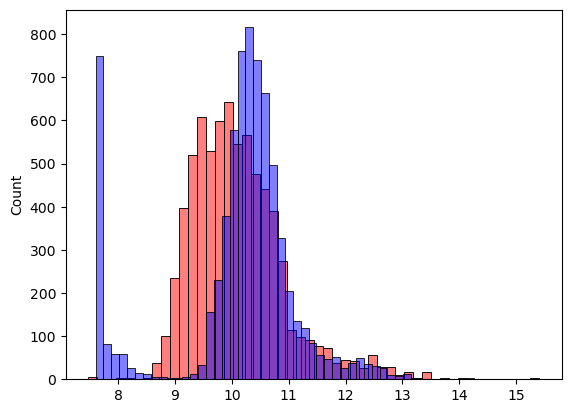

In [1593]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue',  alpha=0.5, bins=50)

- Red: predictions
- Blue: target

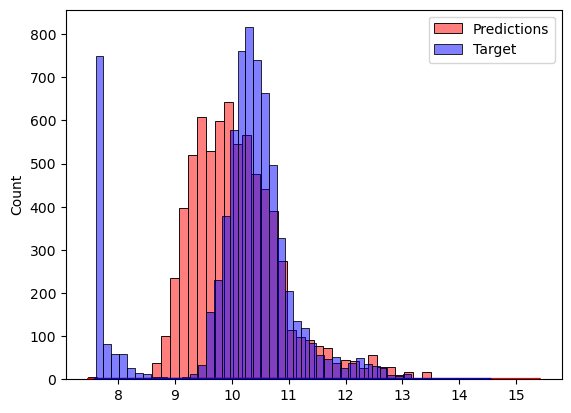

In [1594]:
# Plot histograms
sns.histplot(y_pred, color='red', alpha=0.5, bins=50, label='Predictions', kde=False)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50, label='Target', kde=False)

# Fit and plot a bell curve (normal distribution) for Predictions
mu_pred, std_pred = norm.fit(y_pred)
x_pred = np.linspace(min(y_pred), max(y_pred), 100)
p_pred = norm.pdf(x_pred, mu_pred, std_pred)
plt.plot(x_pred, p_pred, color='red', linewidth=2)

# Fit and plot a bell curve (normal distribution) for Target
mu_train, std_train = norm.fit(y_train)
x_train = np.linspace(min(y_train), max(y_train), 100)
p_train = norm.pdf(x_train, mu_train, std_train)
plt.plot(x_train, p_train, color='blue', linewidth=2)

# Add legend and show plot
plt.legend()
plt.show()

### Root Mean Square Error (RMSE)

Measure the difference between the values predicted by a model and the actual values observed

- quantifies how well a model's predictions match the actual outcomes

In [1595]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [1596]:
rmse(y_train, y_pred)

0.7554192603920132

Value indicates how well the model's predictions match the actual data, with lower values representing better predictive accuracy

### Validate the Model

In [1597]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0) 
    X = df_num.values
    return X

In [1598]:
 # Training

X_train = prepare_X(df1_train) # feature matrix
w0, w = train_linear_regression(X_train, y_train) # Train the linear regression model

# validate

X_val = prepare_X(df1_val) # Prepare the feature matrix X for the validation set
y_pred = w0 + X_val.dot(w) # Generate predictions for the validation set

rmse_val = rmse(y_val, y_pred)
print(rmse_val)

0.761653099130156


### Simple Feature Engineering

In [1599]:
df1_train.head(1)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385


In [1600]:
df1_train.year.max()

2017

In [1601]:
2017 - df1_train.year

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [1602]:
def prepare_X(df1):
    df1 = df1.copy()
    df1['age'] = 2017 - df1['year']
    features = base + ['age']
    
    df_num = df1[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [1603]:
X_train = prepare_X(df1_train)

In [1604]:
df1_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [1605]:
X_train

array([[1.480e+02, 4.000e+00, 3.300e+01, 2.400e+01, 1.385e+03, 9.000e+00],
       [1.320e+02, 4.000e+00, 3.200e+01, 2.500e+01, 2.031e+03, 5.000e+00],
       [1.480e+02, 4.000e+00, 3.700e+01, 2.800e+01, 6.400e+02, 1.000e+00],
       ...,
       [2.850e+02, 6.000e+00, 2.200e+01, 1.700e+01, 5.490e+02, 2.000e+00],
       [5.630e+02, 1.200e+01, 2.100e+01, 1.300e+01, 8.600e+01, 3.000e+00],
       [2.000e+02, 4.000e+00, 3.100e+01, 2.200e+01, 8.730e+02, 0.000e+00]])

In [1606]:
X_train = prepare_X(df1_train)
w0, w = train_linear_regression(X_train, y_train)

# validate

X_val = prepare_X(df1_val)
y_pred = w0 + X_val.dot(w)

rmse_val = rmse(y_val, y_pred)
print(rmse_val)

0.5172055461058299


model has improved

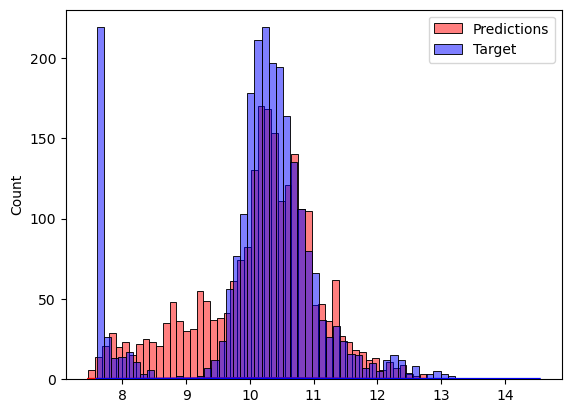

In [1607]:
# Plot histograms
sns.histplot(y_pred, color='red', alpha=0.5, bins=50, label='Predictions', kde=False)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50, label='Target', kde=False)

# Fit and plot a bell curve (normal distribution) for Predictions
mu_pred, std_pred = norm.fit(y_pred)
x_pred = np.linspace(min(y_pred), max(y_pred), 100)
p_pred = norm.pdf(x_pred, mu_pred, std_pred)
plt.plot(x_pred, p_pred, color='red', linewidth=2)

# Fit and plot a bell curve (normal distribution) for Target
mu_train, std_train = norm.fit(y_train)
x_train = np.linspace(min(y_train), max(y_train), 100)
p_train = norm.pdf(x_train, mu_train, std_train)
plt.plot(x_train, p_train, color='blue', linewidth=2)

# Add legend and show plot
plt.legend()
plt.show()

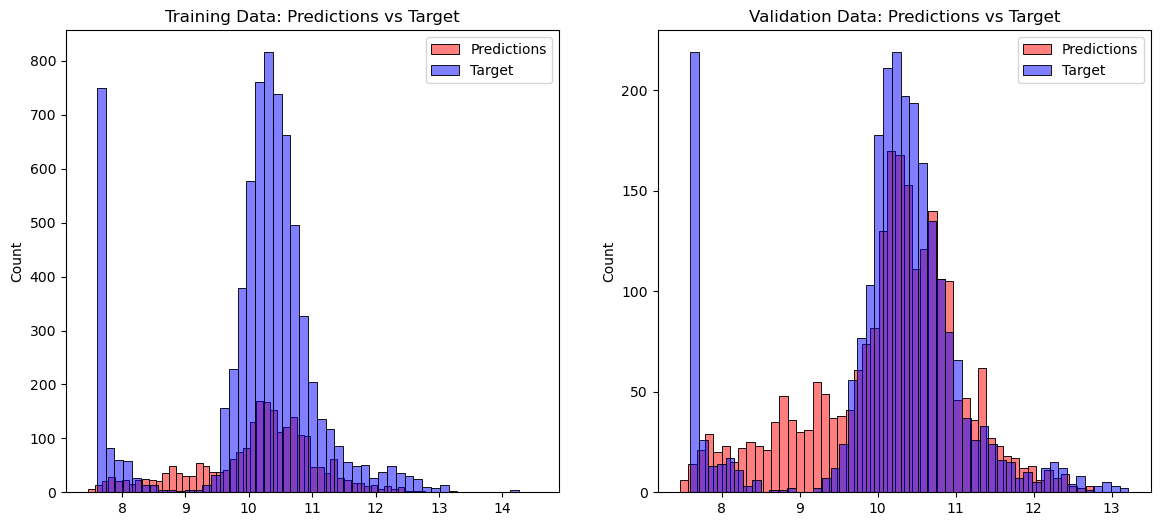

In [1608]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot the first set of histograms (Training data)
sns.histplot(y_pred, color='red', alpha=0.5, bins=50, label='Predictions', kde=False, ax=axs[0])
sns.histplot(y_train, color='blue', alpha=0.5, bins=50, label='Target', kde=False, ax=axs[0])
axs[0].legend()
axs[0].set_title('Training Data: Predictions vs Target')

# Plot the second set of histograms (Validation data)
sns.histplot(y_pred, color='red', alpha=0.5, bins=50, label='Predictions', kde=False, ax=axs[1])
sns.histplot(y_val, color='blue', alpha=0.5, bins=50, label='Target', kde=False, ax=axs[1])
axs[1].legend()
axs[1].set_title('Validation Data: Predictions vs Target')

# Show the plots
plt.show()


Accuracy:
- The model appears to perform better on the training data (left plot) than on the validation data (right plot), as indicated by the closer alignment of the red and blue histograms in the training plot.

Generalization:
- The spread of the predictions in the validation data suggests that the model might be overfitting to the training data, meaning it has learned specific patterns in the training data that do not generalize well to unseen data.

Discrepancy:
- The left plot shows that the predictions are closer to the target values, whereas in the right plot, the predictions diverge more from the target values, particularly on the lower end of the distribution.

### Categorical Variables

In [1609]:
(df1_train.number_of_doors == 2).astype('int')
(df1_train.number_of_doors == 3).astype('int')
(df1_train.number_of_doors == 4).astype('int')

0       0
1       1
2       1
3       0
4       1
       ..
7145    0
7146    0
7147    1
7148    1
7149    1
Name: number_of_doors, Length: 7150, dtype: int32

In [1610]:
# df1_train['num_doors_2'] = (df1_train.number_of_doors == 2).astype('int')
# df1_train['num_doors_3'] = (df1_train.number_of_doors == 3).astype('int')
# df1_train['num_doors_4'] = (df1_train.number_of_doors == 4).astype('int')

for v in [2, 3, 4]:
    df1_train['num_doors_%s' % v] = (df1_train.number_of_doors == v).astype('int')

In [1611]:
df1_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,1,0,0
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,0,0,1
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,0,0,1
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,0,1,0
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,1,0,0
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,1,0,0
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,0,0,1
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,0,0,1


In [1612]:
del df1_train['num_doors_%s']
del df1_train['num_doors_2']
del df1_train['num_doors_3']
del df1_train['num_doors_4']

KeyError: 'num_doors_%s'

In [ ]:
df1_train.head(1)

In [ ]:
def prepare_X(df1):
    df1 = df1.copy()
    features = base.copy()

    df1['age'] = 2017 - df1['year']
    features.append('age')

    for v in [2, 3, 4]:
        df1['num_doors_%s' % v] = (df1.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
    
    df_num = df1[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [ ]:
prepare_X(df1_train)

In [ ]:
X_train = prepare_X(df1_train)
w0, w = train_linear_regression(X_train, y_train)

# validate

X_val = prepare_X(df1_val)
y_pred = w0 + X_val.dot(w)

rmse_val = rmse(y_val, y_pred)
print(rmse_val)

Previous: 0.5172055461058299
- minor improvement

In [ ]:
df.make.value_counts().head()

In [ ]:
makes = list(df.make.value_counts().head().index) # most popular makes of vehicles
makes

In [ ]:
def prepare_X(df1):
    df1 = df1.copy()
    features = base.copy()

    df1['age'] = 2017 - df1['year']
    features.append('age')

    for v in [2, 3, 4]:
        df1['num_doors_%s' % v] = (df1.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)

    for v in makes:
        df1['make_%s' % v] = (df1.make == v).astype('int')
        features.append('make_%s' % v)
    
    df_num = df1[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [ ]:
X_train = prepare_X(df1_train)
w0, w = train_linear_regression(X_train, y_train)

# validate

X_val = prepare_X(df1_val)
y_pred = w0 + X_val.dot(w)

rmse_val = rmse(y_val, y_pred)
print(rmse_val)

Prevous: 0.5157995641501727

In [ ]:
df1_train.dtypes

In [ ]:
categorical_variables = [
    'make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 
    'vehicle_size', 'vehicle_style']

In [ ]:
categories = {}

for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)

In [1613]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [1614]:
def prepare_X(df1):
    df1 = df1.copy()
    features = base.copy()

    df1['age'] = 2017 - df1['year']
    features.append('age')

    for v in [2, 3, 4]:
        df1['num_doors_%s' % v] = (df1.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)

    for c, values in categories.items():
        for v in values:
            df1['%s_%s' % (c, v)] = (df1[c] == v).astype('int')
            features.append('%s_%s' % (c, v)) 
    
    df_num = df1[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [1615]:
X_train = prepare_X(df1_train)
w0, w = train_linear_regression(X_train, y_train)

# validate

X_val = prepare_X(df1_val)
y_pred = w0 + X_val.dot(w)

rmse_val = rmse(y_val, y_pred)
print(rmse_val)

30.090493475303816


****** Significant Difference -- must be something wrong ******

In [1616]:
int(w0)

6775859061080289

In [1617]:
w

array([ 1.60153321e-01,  5.97007995e+00,  3.44242739e+00,  2.03169094e+00,
       -4.29920455e-04,  2.03440439e+00,  1.72759508e+03,  1.76077623e+03,
        1.74391163e+03,  5.41427513e-01,  4.07734659e+00, -5.27809286e-01,
       -6.41118293e+00, -5.33685888e+00,  1.77781114e+02,  1.48717357e+02,
        1.68263773e+02,  1.58118827e+02,  2.07147773e+02, -1.49832648e+16,
       -1.49832648e+16, -1.49832648e+16, -1.49832648e+16, -1.49832648e+16,
        8.20740574e+15,  8.20740574e+15,  8.20740574e+15,  8.20740574e+15,
       -4.36450031e+00, -6.20983238e+00, -6.30240281e+00, -1.47645611e+01,
        2.16584859e+00,  7.38668272e+01,  7.21113575e+01,  7.33879113e+01,
       -4.85492239e-02,  5.44797374e-02,  1.78241160e-01,  3.41906701e-01,
       -1.64412078e-01])

### Regilarization